<a href="https://colab.research.google.com/github/Anandharajan/DriverBehaviour/blob/master/autism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/Anandharajan/DriverBehaviour/master/autism.csv",sep = ",")

In [3]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,autism,contry_of_res,result,relation,asd
0,1,1,0,0,1,1,0,1,0,0,6,m,Others,no,no,Jordan,5,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6,m,Middle Eastern ',no,no,Jordan,5,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6,m,?,no,no,Jordan,5,?,NO
3,0,1,0,0,1,1,0,0,0,1,5,f,?,yes,no,Jordan,4,?,NO
4,1,1,1,1,1,1,1,1,1,1,5,m,Others,yes,no,United States',10,Parent,YES


In [4]:
df.autism.value_counts()

no     243
yes     49
Name: autism, dtype: int64

In [0]:
df['autism'] = df['autism'].apply(lambda x: 0 if x=='no' else 1)

In [0]:
df['asd'] = df['asd'].apply(lambda x: 0 if x=='NO' else 1)

In [7]:
countNoAutism = len(df[df.autism == 0])
countHaveAutism = len(df[df.autism == 1])
print("Percentage of Patients Haven't Autism: {:.2f}%".format((countNoAutism / (len(df.autism))*100)))
print("Percentage of Patients Have Autism: {:.2f}%".format((countHaveAutism / (len(df.autism))*100)))

Percentage of Patients Haven't Autism: 83.22%
Percentage of Patients Have Autism: 16.78%


In [8]:
countNoASD = len(df[df.asd == 0])
countHaveASD = len(df[df.asd == 1])
print("Percentage of Patients Haven't ASD: {:.2f}%".format((countNoASD / (len(df.asd))*100)))
print("Percentage of Patients Have ASD: {:.2f}%".format((countHaveASD / (len(df.asd))*100)))

Percentage of Patients Haven't ASD: 51.71%
Percentage of Patients Have ASD: 48.29%


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


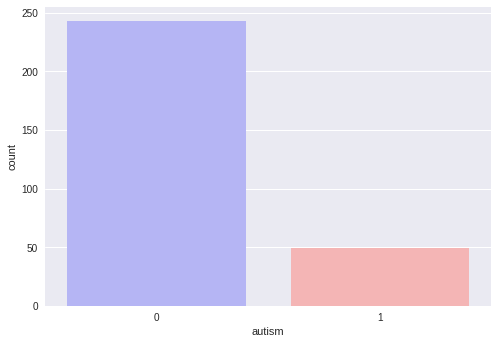

In [9]:
sns.countplot(x="autism", data=df, palette="bwr")
plt.show()

In [0]:
df['gender'] = df['gender'].apply(lambda x: 0 if x=='f' else 1)

In [11]:
df.gender.value_counts()

1    208
0     84
Name: gender, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


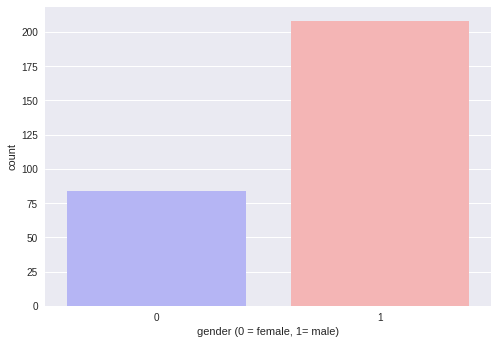

In [12]:
sns.countplot(x="gender", data=df, palette="bwr")
plt.xlabel("gender (0 = female, 1= male)")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


<Figure size 720x720 with 0 Axes>

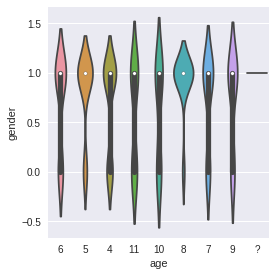

In [13]:
plt.figure(figsize=(10,10))
sns.factorplot(x="age", y="gender", kind='violin',data=df)
plt.show()

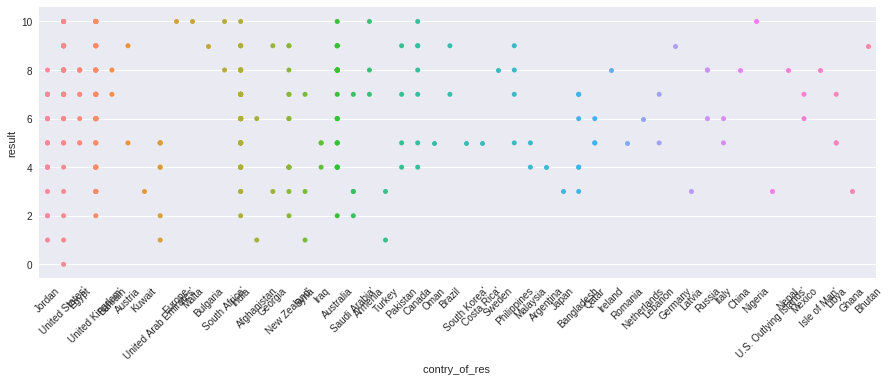

In [14]:
plt.figure(figsize=(15,5))
sns.stripplot(x="contry_of_res ",y='result',data=df)
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


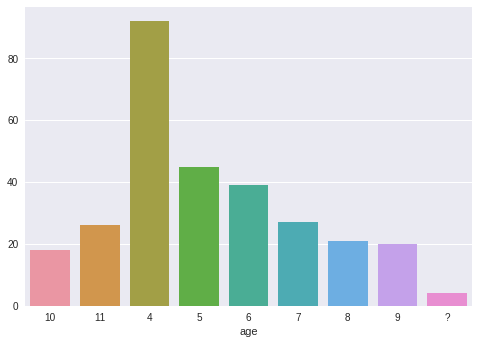

In [15]:
sns.barplot(x=df.groupby('age')['result'].count().index,y=df.groupby('age')['result'].count().values)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


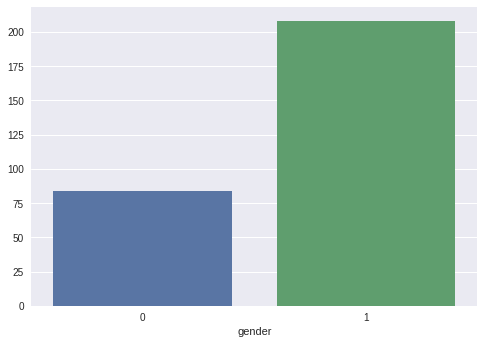

In [16]:
sns.barplot(x=df.groupby('gender')['result'].count().index,y=df.groupby('gender')['result'].count().values)
plt.show()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]), <a list of 14 Text yticklabel objects>)

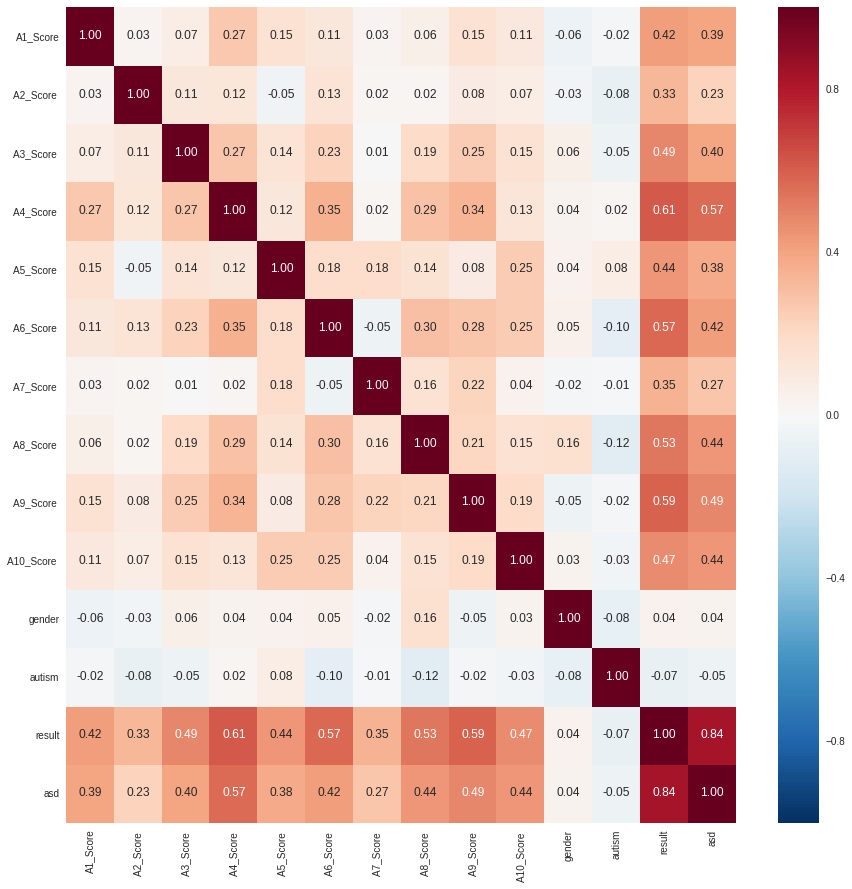

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)

In [0]:
X = df.drop(['ethnicity'], axis=1)
y = df['autism']

In [19]:
for attr in X.columns:
    print('\n*', attr, '*')
    print(X[attr].value_counts())


* A1_Score *
1    185
0    107
Name: A1_Score, dtype: int64

* A2_Score  *
1    156
0    136
Name: A2_Score , dtype: int64

* A3_Score  *
1    217
0     75
Name: A3_Score , dtype: int64

* A4_Score  *
1    161
0    131
Name: A4_Score , dtype: int64

* A5_Score  *
1    217
0     75
Name: A5_Score , dtype: int64

* A6_Score  *
1    208
0     84
Name: A6_Score , dtype: int64

* A7_Score  *
1    177
0    115
Name: A7_Score , dtype: int64

* A8_Score  *
0    147
1    145
Name: A8_Score , dtype: int64

* A9_Score  *
0    148
1    144
Name: A9_Score , dtype: int64

* A10_Score  *
1    212
0     80
Name: A10_Score , dtype: int64

* age *
4     92
5     45
6     39
7     27
11    26
8     21
9     20
10    18
?      4
Name: age, dtype: int64

* gender *
1    208
0     84
Name: gender, dtype: int64

* jundice *
no     212
yes     80
Name: jundice, dtype: int64

* autism *
0    243
1     49
Name: autism, dtype: int64

* contry_of_res  *
United Kingdom'           49
United States'            42
I

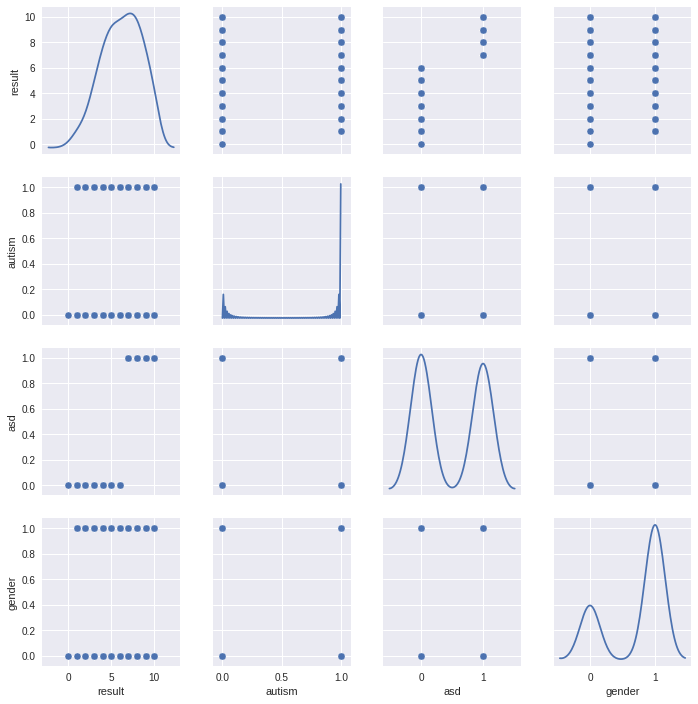

In [21]:
sns.pairplot(df[["result", "age", "autism", "asd", "gender"]], diag_kind="kde")


In [0]:
from sklearn.preprocessing import LabelEncoder

for col in X.columns:
    if len(X[col].value_counts()) == 2:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

In [23]:
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,autism,contry_of_res,result,relation,asd
0,1,1,0,0,1,1,0,1,0,0,6,1,0,0,Jordan,5,Parent,0
1,1,1,0,0,1,1,0,1,0,0,6,1,0,0,Jordan,5,Parent,0
2,1,1,0,0,0,1,1,1,0,0,6,1,0,0,Jordan,5,?,0
3,0,1,0,0,1,1,0,0,0,1,5,0,1,0,Jordan,4,?,0
4,1,1,1,1,1,1,1,1,1,1,5,1,1,0,United States',10,Parent,1


In [0]:
X = pd.get_dummies(X)

In [25]:
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,contry_of_res _U.S. Outlying Islands',contry_of_res _United Arab Emirates',contry_of_res _United Kingdom',contry_of_res _United States',relation_?,relation_Health care professional',relation_Parent,relation_Relative,relation_Self,relation_self
0,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,0,0,0,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,0,0,1,0,0,0


In [0]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

kmeans = KMeans(n_clusters=2)

In [27]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
clusters = kmeans.predict(X)

In [0]:
cluster_df = pd.DataFrame()

cluster_df['cluster'] = clusters
cluster_df['autism'] = y

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


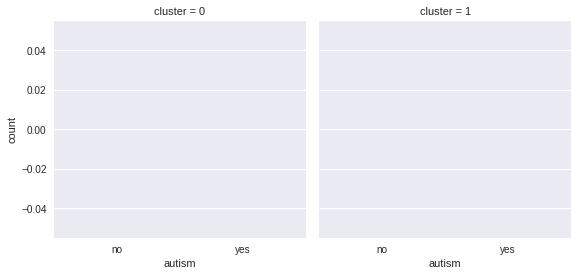

In [30]:
sns.factorplot(col='cluster', y=None, x='autism', data=cluster_df, kind='count', order=['no','yes'], palette=(["#7d069b","#069b15"]))

In [31]:
le = LabelEncoder()
y = le.fit_transform(y)

y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0])

In [0]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20)

In [0]:
kmeans = KMeans(n_clusters=2)

In [0]:
logreg = LogisticRegression()


In [35]:
kmeans.fit(train_X)#Note that kmeans is unlabeled...

logreg.fit(train_X, train_y)#... while logreg IS labeled

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
kmeans_pred = kmeans.predict(test_X)

logreg_pred = logreg.predict(test_X)

In [0]:
kmeans_pred_2 = []
for x in kmeans_pred:
    if x == 1:
        kmeans_pred_2.append(0)
    elif x == 0:
        kmeans_pred_2.append(1)
        
kmeans_pred_2 = np.array(kmeans_pred_2)

In [0]:
if accuracy_score(kmeans_pred, test_y, normalize=False) < accuracy_score(kmeans_pred_2, test_y, normalize=False):
    kmeans_pred = kmeans_pred_2

In [0]:
#This DataFrame will allow us to visualize our results.
result_df = pd.DataFrame()

#The column containing the correct class for each mushroom in the test set, 'test_y'.
result_df['test_y'] = np.array(test_y) #(don't wanna make that mistake again!)

#The predictions made by K-Means on the test set, 'test_X'.
result_df['kmeans_pred'] = kmeans_pred
#The column below will tell us whether each prediction made by our K-Means model was correct.
result_df['kmeans_correct'] = result_df['kmeans_pred'] == result_df['test_y']

#The predictions made by Logistic Regression on the test set, 'test_X'.
result_df['logreg_pred'] = logreg_pred
#The column below will tell us whether each prediction made by our Logistic Regression model was correct.
result_df['logreg_correct'] = result_df['logreg_pred'] == result_df['test_y']

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


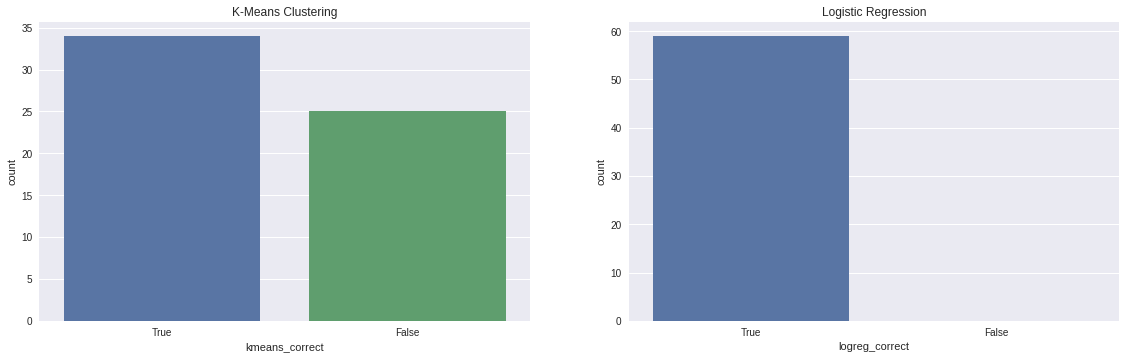

In [40]:
fig, ax = plt.subplots(1,2)
plt.subplots_adjust(right=2)
sns.countplot(x=result_df['kmeans_correct'], order=[True,False], ax=ax[0]).set_title('K-Means Clustering')
sns.countplot(x=result_df['logreg_correct'], order=[True,False], ax=ax[1]).set_title('Logistic Regression')
fig.show()

In [0]:
sns.pairplot(df,hue='autism')

In [0]:
Features = df.drop('gender',axis=1)
Target = df['gender']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])


In [0]:
Features = df.drop('contry_of_res ',axis=1)
Target = df['contry_of_res ']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [0]:
Features = df.drop('relation',axis=1)
Target = df['relation']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])


In [0]:
Features = df.drop('age',axis=1)
Target = df['age']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])


In [0]:
Features = df.drop('jundice',axis=1)
Target = df['jundice']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])


In [0]:
Features = df.drop('autism',axis=1)
Target = df['autism']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])


In [0]:
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=52)

In [60]:
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance

Prediction = Logit_Model.predict(X_test)
Score = accuracy_score(y_test,Prediction)
Report = classification_report(y_test,Prediction)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [63]:
print(Prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [64]:
print(Score)

0.8813559322033898


In [65]:
print(Report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        52
           1       0.00      0.00      0.00         7

   micro avg       0.88      0.88      0.88        59
   macro avg       0.44      0.50      0.47        59
weighted avg       0.78      0.88      0.83        59



In [0]:
xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100,seed=10)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)

In [67]:
print (classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        52
           1       0.33      0.14      0.20         7

   micro avg       0.86      0.86      0.86        59
   macro avg       0.61      0.55      0.56        59
weighted avg       0.83      0.86      0.84        59



In [68]:
print(accuracy_score(y_test,xgb_pred))


0.864406779661017


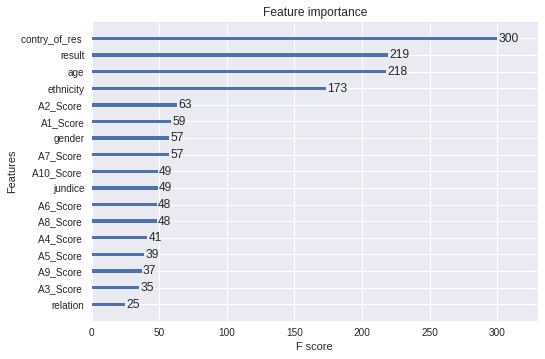

In [69]:
plot_importance(xgb)